# Lab Rotation - Nuno Martinho (4)

### 1. Morgan Fingerprints -  Random Forest

In [171]:
# Inputs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from __future__ import print_function
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, ConfusionMatrixDisplay

In [172]:
# Upload table and fingerprints

Table = pd.read_csv("Database_curated_WithMorgan.csv")
fingerprints_array = np.load('Morgan_Fingerprints.npy')
activity_array = np.load("Activity.npy")

# Add Morgan Fingerprints to my Table dataframe

Table["Morgan Fingerprints"] = fingerprints_array.tolist()

In [173]:
# Splitting as 70 % of our database's morgan fingerprints for training and 30 % for testing - Random (stratify - to keep the ratio of actives and inactives equal in both test and train sets)

X_train1, X_test1, y_train1, y_test1 = train_test_split(fingerprints_array, activity_array, test_size=0.3, random_state=0, stratify=activity_array)

In [174]:
# Confirming our splitting

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((24, 1024), (11, 1024), (24,), (11,))

In [175]:
# Confirming that train and test have the same/similar ratio of actives and inactives

y_train1.sum(), y_test1.sum(), y_train1.sum()/X_train1.shape[0], y_test1.sum()/X_test1.shape[0]

(10.0, 4.0, 0.4166666666666667, 0.36363636363636365)

In [176]:
# Training - forcing to look more into the actives

dic = {0:1, 1:2}
#dic = {0:1, 1:1}
RandomForest1 = RandomForestClassifier(random_state=0, class_weight=dic).fit(X_train1, y_train1)

In [177]:
# Model

RandomForest1

RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=0)

In [178]:
# Prediction of activity from Morgan fingerprints of our data set

y_pred1 = RandomForest1.predict(X_test1)

In [179]:
y_pred1

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.])

In [180]:
# Validation of the model using the test set - Precision and Accuracy metrics

In [181]:
# Accuracy

accuracy_score(y_test1, y_pred1)*100

72.72727272727273

In [182]:
# Precision

precision_score(y_test1, y_pred1)*100

60.0

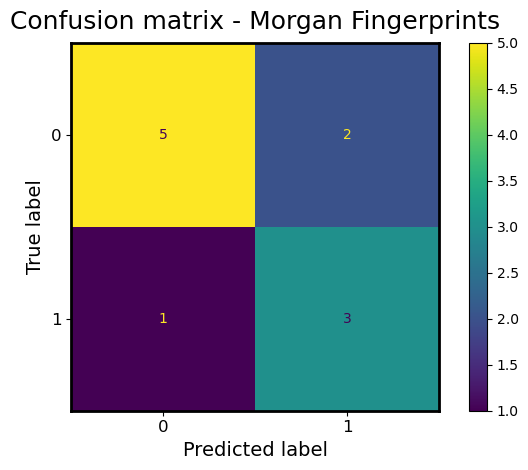

In [183]:
#Confusion matrix

cm = confusion_matrix(y_test1, y_pred1) 

# TP FP
# FN TN

#Confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
f, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_ylabel('True label', fontsize=14)
ax.set_xlabel('Predicted label', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(label="Confusion matrix - Morgan Fingerprints", fontsize=18, pad=10)
#ax.legend(fontsize=10, borderaxespad=0.2, handletextpad=0.2, loc="best")
border_linewidth = 2  # Adjust the linewidth as needed
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(border_linewidth)
ax.spines['right'].set_linewidth(border_linewidth)
ax.spines['bottom'].set_linewidth(border_linewidth)
ax.spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("ConfusionMatrixMorganFingerprints_RandomForest.svg", dpi=600)

plt.show()
# TP FP
# FN TN

### 2. Chemical Descriptors -  Random Forest

In [184]:
# Upload Chemical Descriptors

descriptors_array = np.load("ChemicalDescriptors.npy")

In [185]:
# Splitting as 70 % of our database's morgan fingerprints for training and 30 % for testing - Random (stratify - to keep the ratio of actives and inactives equal in both test and train sets)

X_train2, X_test2, y_train2, y_test2 = train_test_split(descriptors_array, activity_array, test_size=0.3, random_state=0, stratify=activity_array)

In [186]:
# Confirming our splitting

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((24, 210), (11, 210), (24,), (11,))

In [187]:
# Confirming that train and test have the same/similar ratio of actives and inactives

y_train2.sum(), y_test2.sum(), y_train2.sum()/X_train2.shape[0], y_test2.sum()/X_test2.shape[0]

(10.0, 4.0, 0.4166666666666667, 0.36363636363636365)

In [188]:
# Training - forcing to look more into the actives

dic = {0:1, 1:2}
#dic = {0:1, 1:1}
RandomForest2 = RandomForestClassifier(random_state=0, class_weight=dic).fit(X_train2, y_train2)

In [189]:
# Model

RandomForest2

RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=0)

In [190]:
# Prediction of activity from Morgan fingerprints of our data set

y_pred2 = RandomForest2.predict(X_test2)

In [191]:
y_pred2

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.])

In [192]:
# Validation of the model using the test set - Precision and Accuracy metrics

In [193]:
# Accuracy

accuracy_score(y_test2, y_pred2)*100

81.81818181818183

In [194]:
# Precision

precision_score(y_test2, y_pred2)*100

75.0

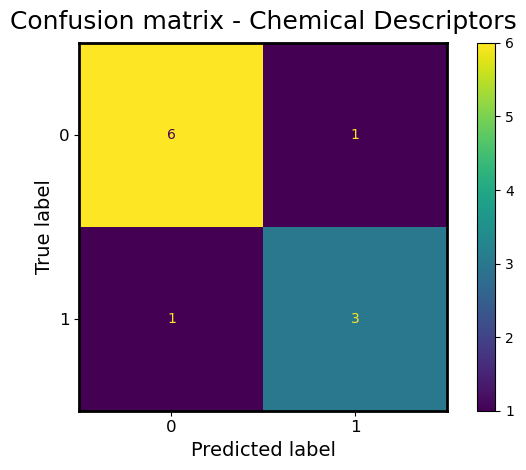

In [195]:
#Confusion matrix

cm2 = confusion_matrix(y_test2, y_pred2) 

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
f, ax = plt.subplots()
disp2.plot(ax=ax)
ax.set_ylabel('True label', fontsize=14)
ax.set_xlabel('Predicted label', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(label="Confusion matrix - Chemical Descriptors", fontsize=18, pad=10)
#ax.legend(fontsize=10, borderaxespad=0.2, handletextpad=0.2, loc="best")
border_linewidth = 2  # Adjust the linewidth as needed
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(border_linewidth)
ax.spines['right'].set_linewidth(border_linewidth)
ax.spines['bottom'].set_linewidth(border_linewidth)
ax.spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("ConfusionMatrixChemicalDescriptors_RandomForest.svg", dpi=600)

plt.show()
# TP FP
# FN TN